In [1]:
from __future__ import division
from operator import itemgetter
from functools import reduce
from copy import deepcopy
from scipy import linalg
from scipy import optimize
import sympy
sympy.init_printing()
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams["font.family"] = "serif"
mpl.rcParams["font.size"] = "12"
from IPython.display import display, Math
import time

In [2]:
def bmatrix(a):
    """Returns a LaTeX bmatrix

    :a: numpy array
    :returns: LaTeX bmatrix as a string
    """
    if len(a.shape) > 2:
        raise ValueError('bmatrix can at most display two dimensions')
    lines = str(a).replace('[', '').replace(']', '').splitlines()
    rv = [r'\begin{bmatrix}']
    rv += ['  ' + ' & '.join(l.split()) + r'\\' for l in lines]
    rv +=  [r'\end{bmatrix}']
    return '\n'.join(rv)

## Linear Algebra - Linear Equation Systems

$$
a_{11} x_1 + a_{12} x_2 = b_1
$$

$$
a_{21} x_1 + a_{22} x_2 = b_2
$$

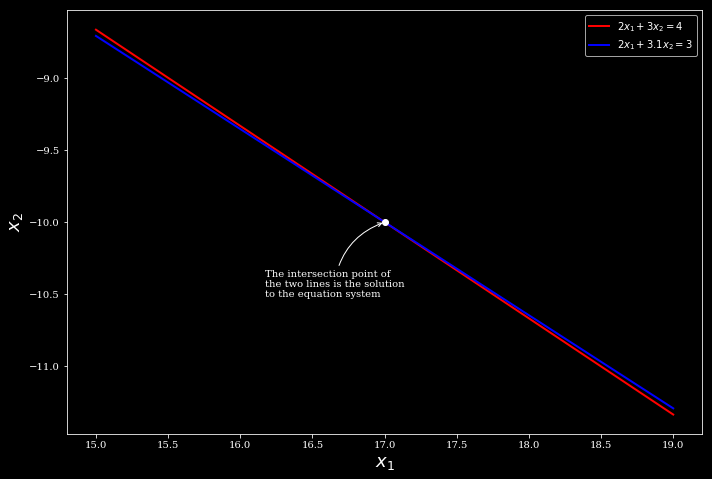

In [3]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(10, 10))

a1 = [2, 3]
b1 = 4
a2 = [2, 3.1]
b2 = 3

A = np.array([a1, a2])
b = np.array([b1, b2])
x = linalg.solve(A, b)

x1 = np.linspace(x[0] - 2, x[0] + 2, 100)

x2_1 = (b1 - a1[0] * x1)/a1[1]
x2_2 = (b2 - a2[0] * x1)/a2[1]

ax.plot(x1, x2_1, 'r', lw=2, label=r"${}x_1+{}x_2={}$".format(a1[0], a1[1], b1))
ax.plot(x1, x2_2, 'b', lw=2, label=r"${}x_1+{}x_2={}$".format(a2[0], a2[1], b2))

ax.plot(x[0], x[1], 'wo', lw=2)
ax.annotate("The intersection point of\nthe two lines is the solution\nto the equation system",
            xy=(x[0], x[1]), xycoords='data',
            xytext=(-120, -75), textcoords='offset points', 
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3, rad=-.3"))

ax.set_xlabel(r"$x_1$", fontsize=18)
ax.set_ylabel(r"$x_2$", fontsize=18)
ax.set_aspect(1)
ax.legend();

fig.tight_layout()

### Gaussian elimination

In [4]:
def gaussian_elimination(A, b, display_steps=False):
    n = len(A)
    
    A_b = np.append(A, b, 1)
    
    if display_steps:
        display(Math(r'\text{Input:}'))
        display(Math('(A,b) = ' + bmatrix(A_b)))

    for i in range(n - 1):
        # Search for maximum in column 'i'
        maxEl = abs(A_b[i][i])
        maxRow = i
        for k in range(i+1, n):
            if abs(A_b[k][i]) > maxEl:
                maxEl = abs(A_b[k][i])
                maxRow = k

        if maxRow != i:
            # Swap row with maximum pivot with current row
            for k in range(i, n+1):
                tmp = A_b[maxRow][k]
                A_b[maxRow][k] = A_b[i][k]
                A_b[i][k] = tmp
        
        if display_steps:
            a_b_str = '(\\bar{{A}}^{{({})}},\\bar{{b}}^{{({})}})'.format(i,i)
            if i != maxRow:
                display(Math('\\text{{Step {}: Pivot (swap rows {} and {})}}'.format(i, i, maxRow)))
            else:
                display(Math('\\text{{Step {}: Pivot (no swap needed as row {} has maximum pivot)}}'.format(i, i)))
            display(Math(a_b_str + ' = ' + bmatrix(A_b)))

        # Make all rows below 'i' equal to 0 in current column
        for k in range(i + 1, n):
            c = -A_b[k][i]/A_b[i][i]
            for j in range(i, n+1):
                if i == j:
                    A_b[k][j] = 0
                else:
                    A_b[k][j] += c * A_b[i][j]
        if display_steps:
            a_b_str = '(A^{{({})}},b^{{({})}})'.format(i+1,i+1)
            display(Math('\\text{{Step {}: Eliminate}}'.format(i)))
            display(Math(a_b_str + ' = ' + bmatrix(A_b)))
                    

    # Solve equation Ax=b for the transformed upper triangular matrix U
    x = [0 for i in range(n)]
    for i in range(n - 1, -1, -1):
        x[i] = A_b[i][n]/A_b[i][i]
        for k in range(i-1, -1, -1):
            A_b[k][n] -= A_b[k][i] * x[i]
    return x

In [5]:
A = np.array([[1., 1., 1.], [1.,2.,3.],[1.,3.,6.]])
b = np.array([[1.],[2.],[3.]])

In [6]:
x = gaussian_elimination(A, b, display_steps=True)
print('Computed solution x = ', x)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Computed solution x =  [0.0, 1.0, -0.0]


In [7]:
n = 5
A = np.random.rand(n,n)
x_expected = np.random.rand(n,1)
b = np.matmul(A, x_expected)

In [8]:
start = time.time()
x = gaussian_elimination(A, b, display_steps=True)
end = time.time()
print('Condition number of A: ', np.linalg.cond(A))
print('Expected solution x = ', x_expected.flatten())
print('Computed solution x = ', x)
print('Error ϵ = {} %'.format(np.linalg.norm(x_expected.flatten() - x)/np.linalg.norm(x_expected)*100))
print('Elapsed time: {} s'.format(end - start))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Condition number of A:  14.378538420281595
Expected solution x =  [0.83645063 0.5700317  0.64014617 0.44077131 0.08072993]
Computed solution x =  [0.8364506270577151, 0.5700317002558187, 0.6401461736390167, 0.44077130882563037, 0.08072992934286238]
Error ϵ = 3.9069814000780865e-14 %
Elapsed time: 0.02586817741394043 s


### LU decomposition

In [9]:
tol = 1e-12
number_of_different_bs = 5
data = []
for i in range(1,9):
    n = 2**i
    A0 = np.random.rand(n,n)
    for i in range(n):
        A0[i][i] = reduce((lambda x, y: x + y), [abs(A0[i][j]) for j in range(n)])
    start = time.time()
    P0, L0, U0 = linalg.lu(A0)
    end = time.time()
    lu_time = end - start
    gaussian_time = 0
    for _ in range(number_of_different_bs):
        x_expected0 = np.random.rand(n, 1)
        b0 = np.matmul(A0, x_expected0)
        start = time.time()
        x0_gaussian = gaussian_elimination(A0, b0, display_steps=False)
        end = time.time()
        gaussian_time += end - start
        start = time.time()
        y0 = np.linalg.solve(L0, np.matmul(P0,b0))
        x0_lu = np.linalg.solve(U0, y0)
        end = time.time()
        lu_time += end - start
        assert np.linalg.norm(np.transpose([x0_gaussian]) - x_expected0) < tol, 'Error in the gaussian computation: error = {}'.format(np.linalg.norm(x0_gaussian - x0_lu))
        assert np.linalg.norm(x0_lu - x_expected0) < tol, 'Error in the lu computation: error = {}'.format(np.linalg.norm(x0_gaussian - x0_lu))
    print(r'Time to solve {0} {1}x{1} problems using the gaussian elimination: {2} s'.format(number_of_different_bs, n, gaussian_time))
    print(r'Time to solve {0} {1}x{1} problems using the LU decomposition: {2} s'.format(number_of_different_bs, n, lu_time))
    print('The LU decomposition is {} times faster than the gaussian elimination'.format(gaussian_time/lu_time))
    data.append([n, gaussian_time, lu_time])
data = np.array(data)

Time to solve 5 2x2 problems using the gaussian elimination: 0.0005970001220703125 s
Time to solve 5 2x2 problems using the LU decomposition: 0.0008304119110107422 s
The LU decomposition is 0.7189204708584553 times faster than the gaussian elimination
Time to solve 5 4x4 problems using the gaussian elimination: 0.000461578369140625 s
Time to solve 5 4x4 problems using the LU decomposition: 0.0003859996795654297 s
The LU decomposition is 1.1957998764669548 times faster than the gaussian elimination
Time to solve 5 8x8 problems using the gaussian elimination: 0.0020813941955566406 s
Time to solve 5 8x8 problems using the LU decomposition: 0.00044798851013183594 s
The LU decomposition is 4.64608834486429 times faster than the gaussian elimination
Time to solve 5 16x16 problems using the gaussian elimination: 0.011731147766113281 s
Time to solve 5 16x16 problems using the LU decomposition: 0.0008027553558349609 s
The LU decomposition is 14.613602613602614 times faster than the gaussian eli

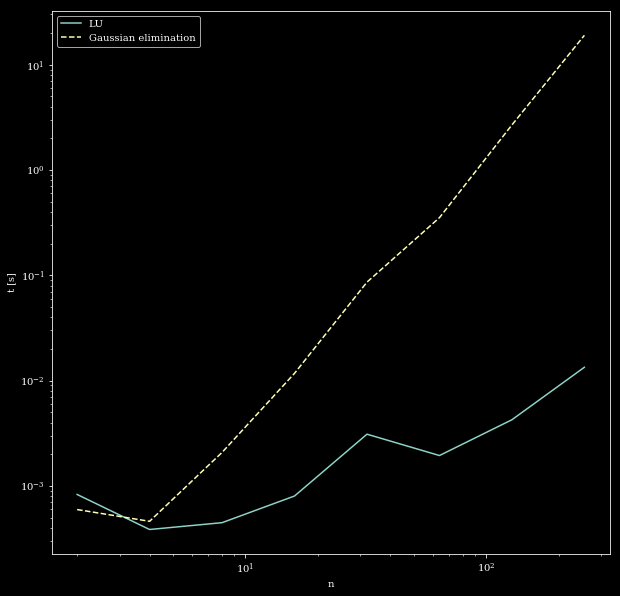

In [10]:
plt.figure(figsize=(10,10))
plt.loglog(data[:,0], data[:,2], label='LU')
plt.loglog(data[:,0], data[:,1], '--', label='Gaussian elimination')
plt.xlabel('n')
plt.ylabel('t [s]')
plt.legend()
plt.show()

### Successive Over Relaxation (SOR)

In [11]:
def sor(A, b, ω=1, tol=1e-6, display_steps=False):
    N = len(b)

    B = np.zeros((N,N))
    for i in range(N):
        B[i][i] = A[i][i]/ω
        for j in range(i):
            B[i][j] = A[i][j]
    
    H = np.identity(N) - np.matmul(np.linalg.inv(B),A)
    
    ρH = max(abs(np.linalg.eigvals(H)))
    if display_steps:
        display(Math('\\text{{Spectral radius of }}I - B^{{-1}}A: {}'.format(ρH)))
    
    if ρH > 1:
        print("Doesn't converge.")
        return
    
    print_freq = 10
    
    max_iterations = 1000
    
    x = np.zeros(N)
    xprev = deepcopy(x)
    for i in range(max_iterations):
        for j in range(N):
            summL = 0
            summU = 0
            if j > 0:
                summL = reduce(lambda x,y: x + y, [A[j][k]*x[k] for k in range(j)])
            if j < N - 1:
                summU = reduce(lambda x,y: x + y, [A[j][k]*xprev[k] for k in range(j + 1, N)])
            x[j] = (b[j] - summL - summU)/A[j][j]
        x = np.array([(1 - ω)*xprev[i] + ω*x[i] for i in range(N)])
        diffnorm = np.linalg.norm(x - xprev, 1)
        oldnorm = np.linalg.norm(xprev, 1)
        if oldnorm == 0:
            oldnorm = 1
        norm = diffnorm / oldnorm
        if display_steps:
            if i % print_freq == 0:
                a_b_str = 'x^{{({})}}'.format(i+1)
                display(Math(a_b_str + ' = ' + bmatrix(x)))
        
        if (norm < tol) and i != 0:
            if display_steps:
                a_b_str = 'x^{{({})}}'.format(i+1)
                display(Math(r'\text{Sequence satisfies tolerance at }' + a_b_str + ' = ' + bmatrix(x)))
                print('Took', i + 1, 'iterations.')
            return x
        xprev = deepcopy(x)
    

In [12]:
def compare(x, x_expected, A):
    print('Expected solution x = ', x_expected.flatten())
    print('Computed solution x = ', x)
    print('Error ϵ = {} %'.format(np.linalg.norm(x_expected.flatten() - x)/np.linalg.norm(x_expected)*100))
    return

print('Condition number of A: ', np.linalg.cond(A))
x = sor(A, b, ω=0.95)
if x is not None:
    compare(x, x_expected, A)

for i in range(len(b)):
    A[i][i] = reduce((lambda x, y: x + y), [abs(A[i][j]) for j in range(len(b))])
b = np.matmul(A, x_expected)
display(Math('\\text{{Novel A }} = {}'.format(np.array(bmatrix(A)))))
print('\nCondition number of A: ', np.linalg.cond(A))
start = time.time()
x = sor(A, b, ω=0.95, display_steps=True)
end = time.time()
if x is not None:
    compare(x, x_expected, A)
print('Elapsed time: {} s'.format(end - start))

Condition number of A:  14.378538420281595
Doesn't converge.


<IPython.core.display.Math object>


Condition number of A:  3.7535369204235574


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Took 11 iterations.
Expected solution x =  [0.83645063 0.5700317  0.64014617 0.44077131 0.08072993]
Computed solution x =  [0.83645086 0.57003172 0.64014636 0.44077124 0.08072982]
Error ϵ = 2.5781456758384478e-05 %
Elapsed time: 0.008821964263916016 s


In [13]:
data = []
for i in range(10):
    n = 2**i
    A0 = np.random.rand(n,n)
    for i in range(n):
        A0[i][i] = reduce((lambda x, y: x + y), [abs(A0[i][j]) for j in range(n)])
    x_expected0 = np.random.rand(n,1)
    b0 = np.matmul(A0, x_expected0)
    start = time.time()
    x0 = gaussian_elimination(A0, b0, display_steps=False)
    end = time.time()
    gaussian_time = end - start
    start = time.time()
    x0 = sor(A0, b0, ω=1.0) # ω = 1 is the Gauss-Seidel method
    end = time.time()
    gauss_seidel_time = end - start
    print(r'Time to solve an {0}x{0} problem using gaussian elimination: {1} s'.format(n, gaussian_time))
    print(r'Time to solve an {0}x{0} problem using the Gauss-Seidel iterative method: {1} s'.format(n, gauss_seidel_time))
    data.append([n, gaussian_time, gauss_seidel_time])

Time to solve an 1x1 problem using gaussian elimination: 2.6226043701171875e-05 s
Time to solve an 1x1 problem using the Gauss-Seidel iterative method: 0.0002949237823486328 s
Time to solve an 2x2 problem using gaussian elimination: 3.814697265625e-05 s
Time to solve an 2x2 problem using the Gauss-Seidel iterative method: 0.0012340545654296875 s
Time to solve an 4x4 problem using gaussian elimination: 5.888938903808594e-05 s
Time to solve an 4x4 problem using the Gauss-Seidel iterative method: 0.002858877182006836 s
Time to solve an 8x8 problem using gaussian elimination: 0.00024080276489257812 s
Time to solve an 8x8 problem using the Gauss-Seidel iterative method: 0.0017898082733154297 s
Time to solve an 16x16 problem using gaussian elimination: 0.0015311241149902344 s
Time to solve an 16x16 problem using the Gauss-Seidel iterative method: 0.005433082580566406 s
Time to solve an 32x32 problem using gaussian elimination: 0.008675098419189453 s
Time to solve an 32x32 problem using the G

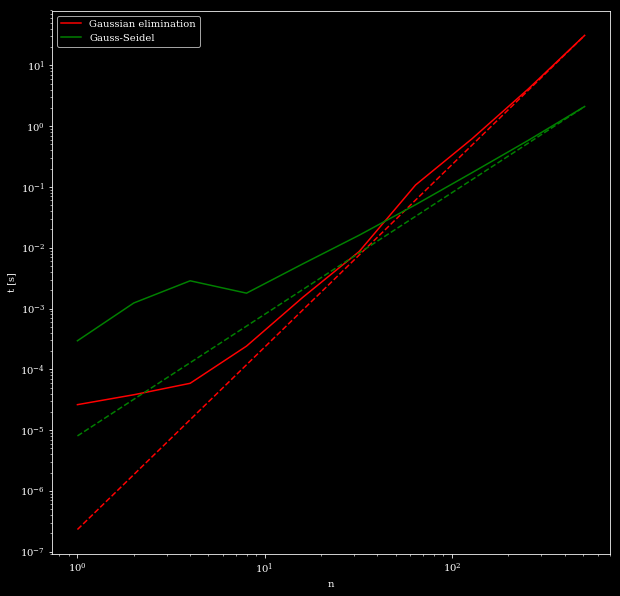

In [14]:
data = np.array(data)
no_pts = 1000
k = data[-1,1]/data[-1,0]**3
x_cubic = [data[0,0] + i/no_pts*data[-1,0] for i in range(no_pts)]
y_cubic = [k*x**3 for x in x_cubic]
k = data[-1,2]/data[-1,0]**2
x_quad = [data[0,0] + i/no_pts*data[-1,0] for i in range(no_pts)]
y_quad = [k*x**2 for x in x_quad]
plt.figure(figsize=(10,10))
plt.loglog(x_cubic, y_cubic, 'r--')
plt.loglog(data[:,0], data[:, 1], 'r', label='Gaussian elimination')
plt.loglog(x_quad, y_quad, 'g--')
plt.loglog(data[:,0], data[:, 2], 'g', label='Gauss-Seidel')
plt.xlabel('n')
plt.ylabel('t [s]')
plt.legend()
plt.show()

### Symbolic approach

In [ ]:
A = sympy.Matrix([[2, 3], [5, 4]])
b = sympy.Matrix([4, 3])

In [ ]:
A.rank()

In [ ]:
A.condition_number()

In [ ]:
A.norm()

In [ ]:
L, U, _ = A.LUdecomposition()

In [ ]:
L

In [ ]:
U

In [ ]:
A

In [ ]:
L * U

In [ ]:
y = L.solve(b)
y

In [ ]:
x = U.solve(y)
x

In [ ]:
x = A.solve(b)
x

### Numerical approach

In [ ]:
A = np.array([[2, 3], [5, 4]])
b = np.array([4, 3])

In [ ]:
np.linalg.matrix_rank(A)

In [ ]:
np.linalg.cond(A)

In [ ]:
np.linalg.norm(A)

In [ ]:
P, L, U = linalg.lu(A)

In [ ]:
P

In [ ]:
L

In [ ]:
U

In [ ]:
np.matmul(P,A)

In [ ]:
np.matmul(L,U)

In [ ]:
y = np.linalg.solve(L, np.matmul(P,b))
y

In [ ]:
x = np.linalg.solve(U, y)
x

In [ ]:
x = np.linalg.solve(A, b)
x

### Example : rank and condition numbers -> numerical errors

In [ ]:
p = sympy.symbols("p", positive=True)

In [ ]:
A = sympy.Matrix([[1, sympy.sqrt(p)], [1, 1/sympy.sqrt(p)]])
A

In [ ]:
b = sympy.Matrix([1, 2])
b

In [ ]:
sympy.simplify(A.solve(b))

In [ ]:
# Symbolic problem specification
p = sympy.symbols("p", positive=True)
A = sympy.Matrix([[1, sympy.sqrt(p)], [1, 1/sympy.sqrt(p)]])
b = sympy.Matrix([1, 2])

# Solve symbolically
x_sym_sol = A.solve(b)
x_sym_sol.simplify()
x_sym_sol
Acond = A.condition_number().simplify()

# Function for solving numerically
AA = lambda p: np.array([[1, np.sqrt(p)], [1, 1/np.sqrt(p)]])
bb = np.array([1, 2])
x_num_sol = lambda p: np.linalg.solve(AA(p), bb)

# Graph the difference between the symbolic (exact) and numerical results.
p_vec = np.linspace(0.9, 1.1, 200)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

for n in range(2):
    x_sym = np.array([x_sym_sol[n].subs(p, pp).evalf() for pp in p_vec])
    x_num = np.array([x_num_sol(pp)[n] for pp in p_vec])
    axes[0].plot(p_vec, (x_num - x_sym)/x_sym, 'r')
axes[0].set_title("Error in solution\n(numerical - symbolic)/symbolic")
axes[0].set_xlabel(r'$p$', fontsize=18)

axes[1].plot(p_vec, [Acond.subs(p, pp).evalf() for pp in p_vec])
axes[1].set_title("Condition number")
axes[1].set_xlabel(r'$p$', fontsize=18)

fig.tight_layout()

### Hilbert Matrix

$$
h_{ij} = \frac{1}{i+j+1},\ \ i,j=1,2,\ldots,n
$$

In [ ]:
from scipy.linalg import hilbert

n_max = 21
n_runs = 200

cond_numbers = np.zeros(n_max)
errors = np.zeros(n_max)
for n in range(2, n_max):
    cond_numbers_trials = []
    error_trials = []
    for i in range(n_runs):
        A = hilbert(n)
        x_expected = np.random.rand(n,1)
        b = np.matmul(A,x_expected)
        cond_numbers_trials.append(np.linalg.cond(A))
        x = la.solve(A, b)
        error_trials.append(np.linalg.norm(x_expected.flatten() - x.flatten())/np.linalg.norm(x_expected))
    cond_numbers[n] = np.mean(cond_numbers_trials)
    errors[n] = np.mean(error_trials)

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
N = 10
xmin, xmax = 2,20

axes[0].semilogy(range(2,n_max), errors[2:])
axes[0].set_title("Error in solution\n(computed - expected)/expected")
axes[0].set_xlabel(r'$n$', fontsize=18)
axes[0].set_xticks(np.round(np.linspace(xmin, xmax, N), 2))

axes[1].semilogy(range(2, n_max), cond_numbers[2:])
axes[1].set_title("Condition number")
axes[1].set_xlabel(r'$n$', fontsize=18)
axes[1].set_xticks(np.round(np.linspace(xmin, xmax, N), 2))

fig.tight_layout()